In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data=pd.read_csv('Dataset_Final4.csv')

## Data Discretization

In [3]:
bins = [0, 5, 6, 7, 8, 9, 10]
labels = [5, 6, 7, 8, 9, 10]
data['CGPA'] = pd.cut(data['CGPA'], bins=bins, labels=labels)
data['CGPA'] = data['CGPA'].astype(float)
data

,Name,Roll No,Degree,Gender,Sem,CGPA,Age,Height,Weight,BMI,Gym/badminton
0,SENTHIL NIRAI NILAVU P V S,ME20B2004,B.Tech,Female,7.0,8.0,22.0,173.0,81.0,27.06,0.0
1,KOLLIPARA UMA AYYAPPA SAI SRIKAR,EC22B1084,B.Tech,Male,3.0,6.0,20.0,167.0,67.0,24.02,0.0
2,KETHAVATH ANIL,CS20B1049,B.Tech,Male,7.0,7.0,22.0,170.0,74.0,25.61,0.0
3,RAGHUMANDALA SIVA KIRAN,EC21B1045,B.Tech,Male,5.0,10.0,19.0,179.0,93.0,29.03,0.0
4,B GANESH,ME21B1014,B.Tech,Male,5.0,8.0,21.0,171.0,68.0,23.26,1.0
...,...,...,...,...,...,...,...,...,...,...,...
812,TENALI ANIL KUMAR,EC21B1078,B.Tech,Male,5.0,10.0,19.0,175.0,67.0,21.88,1.0
813,CHERUKURI KULADEEP GUPTHA,CS21B1064,B.Tech,Male,5.0,9.0,21.0,184.0,86.0,25.40,0.0
814,S.MUTHU SHRAVAN,ME20B1009,B.Tech,Male,7.0,8.0,21.0,168.0,71.0,25.16,0.0
815,SURYA RAGHAV B,CS21B2042,B.Tech,Male,5.0,6.0,21.0,169.0,72.0,25.21,1.0


In [4]:
print(data['Gender'].unique())
data.loc[data['Gender'] == 'Male', 'Gender'] = 0
data.loc[data['Gender'] == 'Female', 'Gender'] = 1

data['Gender'] = data['Gender'].astype(float)

['Female' 'Male' nan]


## Data Cleaning 

In [5]:
print(len(data))
df_no_duplicates = data.dropna()
print(len(df_no_duplicates))
df_no_duplicates = df_no_duplicates.drop_duplicates(subset=['Name','Roll No'])
print(len(df_no_duplicates))


817
807
755


In [6]:
print(df_no_duplicates.describe())

           Gender         Sem        CGPA         Age      Height      Weight  \
count  755.000000  755.000000  755.000000  755.000000  755.000000  755.000000   
mean     0.156291    4.780132    7.992053   20.127152  171.634437   73.601325   
std      0.363372    1.631708    1.455782    1.472918    7.395344   11.586315   
min      0.000000    3.000000    6.000000   18.000000  100.000000   28.000000   
25%      0.000000    3.000000    7.000000   19.000000  168.000000   67.000000   
50%      0.000000    5.000000    8.000000   20.000000  172.000000   72.000000   
75%      0.000000    7.000000    9.000000   21.000000  175.000000   80.000000   
max      1.000000    7.000000   10.000000   26.000000  190.000000  120.000000   

              BMI  Gym/badminton  
count  755.000000     755.000000  
mean    24.859232       0.385430  
std      2.652781       0.487019  
min     15.700000       0.000000  
25%     23.050000       0.000000  
50%     24.800000       0.000000  
75%     26.880000       1

In [7]:
df_no_duplicates['Height'].fillna(round(df_no_duplicates['Height'].mean(),2), inplace=True)
df_no_duplicates['Weight'].fillna(round(df_no_duplicates['Weight'].mean(),2), inplace=True)
df_no_duplicates['CGPA'].fillna(df_no_duplicates['CGPA'].median(), inplace=True)

<Axes: >

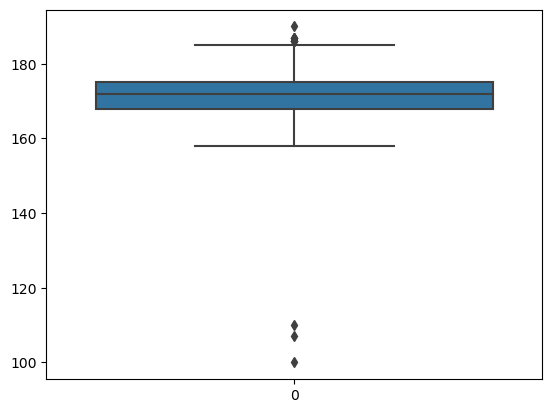

In [8]:
sns.boxplot(df_no_duplicates['Height'])


<Axes: >

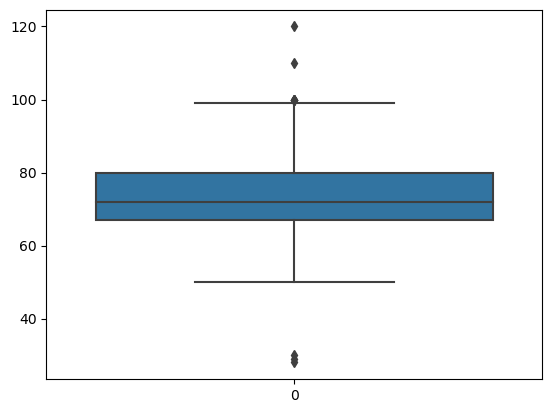

In [9]:
sns.boxplot(df_no_duplicates['Weight'])

<Axes: >

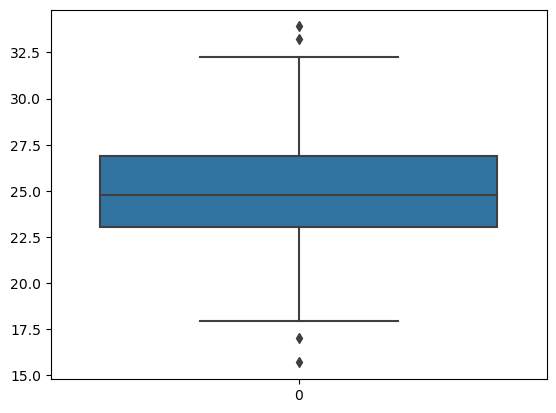

In [10]:
sns.boxplot(df_no_duplicates['BMI'])

In [11]:
df = df_no_duplicates
Q1 = df.Height.quantile(0.25)
Q3 = df.Height.quantile(0.75)
Q1, Q3

(168.0, 175.0)

In [12]:
IQR = Q3 - Q1
IQR

7.0

In [13]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(157.5, 185.5)

In [14]:
height_outliers = df[(df.Height<lower_limit)|(df.Height>upper_limit)]
height_outliers

,Name,Roll No,Degree,Gender,Sem,CGPA,Age,Height,Weight,BMI,Gym/badminton
30,V.S.HARDHIK RAJ,EC22B1048,B.Tech,0.0,3.0,8.0,18.0,186.0,85.0,24.57,1.0
47,VARIKUTI NARENDRA REDDY,ME20B1234,B.Tech,0.0,7.0,9.0,22.0,107.0,29.0,25.33,1.0
62,ANDEY AASHISH,ME22B2212,B.Tech,0.0,3.0,8.0,19.0,190.0,120.0,33.24,1.0
99,IYAPPAN MUTHUKUMAR K,ME22B1074,B.Tech,0.0,3.0,10.0,18.0,186.0,98.0,28.33,0.0
352,B PRANEETH,ME21B2031,B.Tech,0.0,5.0,6.0,21.0,187.0,92.0,26.31,0.0
356,KANCHARLA BABA CHARAN,EC21B1200,B.Tech,0.0,5.0,9.0,21.0,110.0,28.0,23.14,1.0
365,AZAD KUMAR,EC22B1109,B.Tech,0.0,3.0,7.0,19.0,187.0,88.0,25.17,1.0
515,GEDUPUDI BHARGHAV RAM,CS21B1090,B.Tech,0.0,5.0,9.0,20.0,100.0,30.0,30.00,0.0
566,BALIREDDY KALYAN SRIDHAR,ME22B1014,B.Tech,0.0,3.0,9.0,18.0,186.0,84.0,24.28,1.0
597,KONDABA DATTATRAY ASOLE,EC22B1036,B.Tech,0.0,3.0,10.0,18.0,186.0,85.0,24.57,1.0


In [15]:
new_df = df[(df.Height>lower_limit)&(df.Height<upper_limit)]

In [16]:
new_df.describe()

,Gender,Sem,CGPA,Age,Height,Weight,BMI,Gym/badminton
count,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000
mean,0.158602,4.790323,7.982527,20.138441,171.736559,73.576613,24.836465,0.381720
std,0.365550,1.633799,1.456767,1.471460,5.943924,11.088148,2.643145,0.486135
min,0.000000,3.000000,6.000000,18.000000,158.000000,50.000000,15.700000,0.000000
25%,0.000000,3.000000,7.000000,19.000000,168.000000,67.000000,22.990000,0.000000
50%,0.000000,5.000000,8.000000,20.000000,172.000000,72.000000,24.800000,0.000000
75%,0.000000,7.000000,9.000000,21.000000,175.000000,80.000000,26.880000,1.000000
max,1.000000,7.000000,10.000000,26.000000,185.000000,110.000000,33.910000,1.000000


<Axes: >

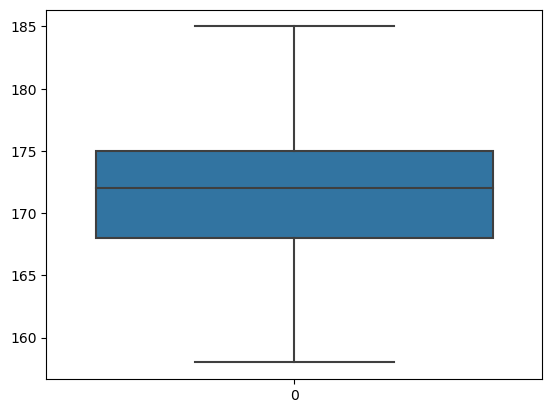

In [17]:
sns.boxplot(new_df['Height'])

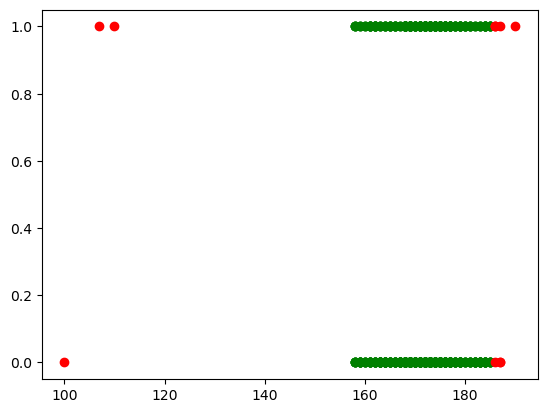

In [18]:
plt.scatter(y=np.array(new_df['Gym/badminton']), x=np.array(new_df['Height']), c='g', marker = 'o')
plt.scatter(y=np.array(height_outliers['Gym/badminton']), x=np.array(height_outliers['Height']), c='r', marker = 'o')
plt.show()

<Axes: >

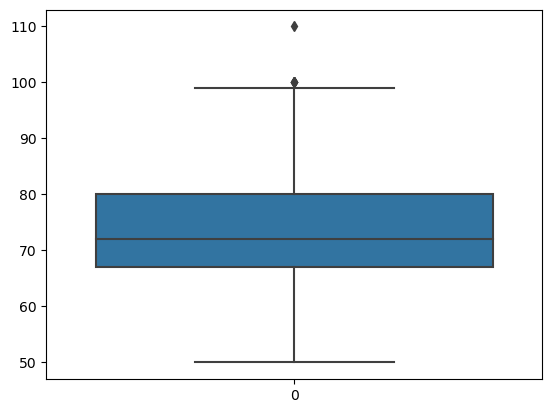

In [19]:
sns.boxplot(new_df['Weight'])

In [20]:
Q1 = new_df.Weight.quantile(0.25)
Q3 = new_df.Weight.quantile(0.75)
Q1, Q3

(67.0, 80.0)

In [21]:
IQR = Q3 - Q1
IQR

13.0

In [22]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(47.5, 99.5)

In [23]:
weight_outliers = new_df[(new_df.Weight<lower_limit)|(new_df.Weight>upper_limit)]
new_df = new_df[(new_df.Weight>lower_limit)&(new_df.Weight<upper_limit)]
weight_outliers

,Name,Roll No,Degree,Gender,Sem,CGPA,Age,Height,Weight,BMI,Gym/badminton
11,RUSHABH RAJUKUMAR DARJI,EC21B1088,B.Tech,0.0,5.0,6.0,20.0,176.0,100.0,32.28,0.0
73,PRADEEP YADAV,EC22B1056,B.Tech,0.0,3.0,10.0,20.0,181.0,100.0,30.52,1.0
177,KRISHNA K BHARADWAJ,EC22B1073,B.Tech,0.0,3.0,6.0,18.0,179.0,100.0,31.21,1.0
364,THUMMA NAGENDRA KUMAR,ME22B2005,B.Tech,0.0,3.0,8.0,20.0,185.0,100.0,29.22,0.0
417,SURAJ KUMAR,ME22B1073,B.Tech,0.0,3.0,10.0,19.0,179.0,100.0,31.21,1.0
422,MYNENI KUSHMA,EC22B1201,B.Tech,1.0,3.0,9.0,19.0,185.0,110.0,32.14,0.0


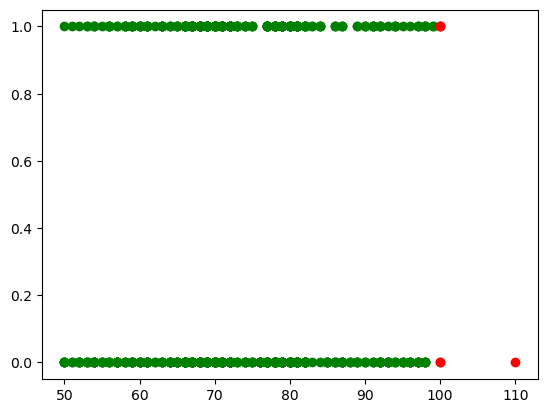

In [24]:
plt.scatter(y=np.array(new_df['Gym/badminton']), x=np.array(new_df['Weight']), c='g', marker = 'o')
plt.scatter(y=np.array(weight_outliers['Gym/badminton']), x=np.array(weight_outliers['Weight']), c='r', marker = 'o')
plt.show()

<Axes: >

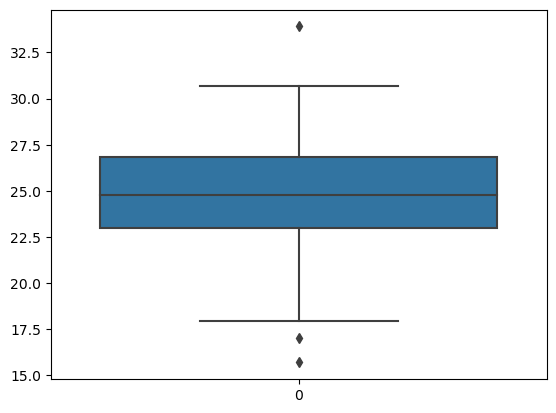

In [25]:
sns.boxplot(new_df['BMI'])

In [26]:
Q1 = new_df.BMI.quantile(0.25)
Q3 = new_df.BMI.quantile(0.75)
Q1, Q3

(22.99, 26.82)

In [27]:
IQR = Q3 - Q1
IQR

3.830000000000002

In [28]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(17.244999999999997, 32.565000000000005)

In [29]:
bmi_outliers = new_df[(new_df.BMI<lower_limit)|(new_df.BMI>upper_limit)]
new_df = new_df[(new_df.BMI>lower_limit)&(new_df.BMI<upper_limit)]
bmi_outliers

,Name,Roll No,Degree,Gender,Sem,CGPA,Age,Height,Weight,BMI,Gym/badminton
583,VANIPENTA VARSHITH REDDY,EC20B1206,B.Tech,0.0,7.0,9.0,22.0,178.0,54.0,17.04,1.0
616,DEVARAKONDA KARTHIKEYA,CS21B2049,B.Tech,0.0,5.0,9.0,21.0,182.0,52.0,15.70,0.0
751,CHEPURI VARSHA,CS20B1170,B.Tech,1.0,7.0,10.0,20.0,170.0,98.0,33.91,0.0


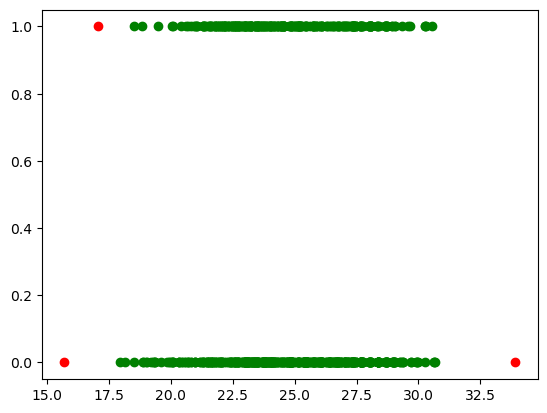

In [30]:
plt.scatter(y=np.array(new_df['Gym/badminton']), x=np.array(new_df['BMI']), c='g', marker = 'o')
plt.scatter(y=np.array(bmi_outliers['Gym/badminton']), x=np.array(bmi_outliers['BMI']), c='r', marker = 'o')
plt.show()

In [31]:
data =df
data['z_score1'] = (data.Height - data.Height.mean())/data.Height.std()
data['z_score2'] = (data.Weight - data.Weight.mean())/data.Weight.std()
weight_outliers = data[(data['z_score2']>3)|(data['z_score2']<-3)]
weight_outliers

,Name,Roll No,Degree,Gender,Sem,CGPA,Age,Height,Weight,BMI,Gym/badminton,z_score1,z_score2
47,VARIKUTI NARENDRA REDDY,ME20B1234,B.Tech,0.0,7.0,9.0,22.0,107.0,29.0,25.33,1.0,-8.739882,-3.849483
62,ANDEY AASHISH,ME22B2212,B.Tech,0.0,3.0,8.0,19.0,190.0,120.0,33.24,1.0,2.483395,4.004610
356,KANCHARLA BABA CHARAN,EC21B1200,B.Tech,0.0,5.0,9.0,21.0,110.0,28.0,23.14,1.0,-8.334221,-3.935792
422,MYNENI KUSHMA,EC22B1201,B.Tech,1.0,3.0,9.0,19.0,185.0,110.0,32.14,0.0,1.807294,3.141523
515,GEDUPUDI BHARGHAV RAM,CS21B1090,B.Tech,0.0,5.0,9.0,20.0,100.0,30.0,30.00,0.0,-9.686423,-3.763174


In [32]:
height_outliers = data[(data['z_score1']>3)|(data['z_score1']<-3)]
height_outliers

,Name,Roll No,Degree,Gender,Sem,CGPA,Age,Height,Weight,BMI,Gym/badminton,z_score1,z_score2
47,VARIKUTI NARENDRA REDDY,ME20B1234,B.Tech,0.0,7.0,9.0,22.0,107.0,29.0,25.33,1.0,-8.739882,-3.849483
356,KANCHARLA BABA CHARAN,EC21B1200,B.Tech,0.0,5.0,9.0,21.0,110.0,28.0,23.14,1.0,-8.334221,-3.935792
515,GEDUPUDI BHARGHAV RAM,CS21B1090,B.Tech,0.0,5.0,9.0,20.0,100.0,30.0,30.00,0.0,-9.686423,-3.763174


In [33]:
new_data = data[(data['z_score1']<3)&(data['z_score1']>-3)&(data['z_score2']<3)&(data['z_score2']>-3)]
new_data

,Name,Roll No,Degree,Gender,Sem,CGPA,Age,Height,Weight,BMI,Gym/badminton,z_score1,z_score2
0,SENTHIL NIRAI NILAVU P V S,ME20B2004,B.Tech,1.0,7.0,8.0,22.0,173.0,81.0,27.06,0.0,0.184652,0.638570
1,KOLLIPARA UMA AYYAPPA SAI SRIKAR,EC22B1084,B.Tech,0.0,3.0,6.0,20.0,167.0,67.0,24.02,0.0,-0.626670,-0.569752
2,KETHAVATH ANIL,CS20B1049,B.Tech,0.0,7.0,7.0,22.0,170.0,74.0,25.61,0.0,-0.221009,0.034409
3,RAGHUMANDALA SIVA KIRAN,EC21B1045,B.Tech,0.0,5.0,10.0,19.0,179.0,93.0,29.03,0.0,0.995973,1.674275
4,B GANESH,ME21B1014,B.Tech,0.0,5.0,8.0,21.0,171.0,68.0,23.26,1.0,-0.085789,-0.483443
...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,ANIRUDH SATHISH,CS20B1125,B.Tech,0.0,7.0,6.0,20.0,171.0,67.0,22.91,1.0,-0.085789,-0.569752
812,TENALI ANIL KUMAR,EC21B1078,B.Tech,0.0,5.0,10.0,19.0,175.0,67.0,21.88,1.0,0.455092,-0.569752
813,CHERUKURI KULADEEP GUPTHA,CS21B1064,B.Tech,0.0,5.0,9.0,21.0,184.0,86.0,25.40,0.0,1.672074,1.070114
814,S.MUTHU SHRAVAN,ME20B1009,B.Tech,0.0,7.0,8.0,21.0,168.0,71.0,25.16,0.0,-0.491449,-0.224517


In [34]:
new_df

,Name,Roll No,Degree,Gender,Sem,CGPA,Age,Height,Weight,BMI,Gym/badminton
0,SENTHIL NIRAI NILAVU P V S,ME20B2004,B.Tech,1.0,7.0,8.0,22.0,173.0,81.0,27.06,0.0
1,KOLLIPARA UMA AYYAPPA SAI SRIKAR,EC22B1084,B.Tech,0.0,3.0,6.0,20.0,167.0,67.0,24.02,0.0
2,KETHAVATH ANIL,CS20B1049,B.Tech,0.0,7.0,7.0,22.0,170.0,74.0,25.61,0.0
3,RAGHUMANDALA SIVA KIRAN,EC21B1045,B.Tech,0.0,5.0,10.0,19.0,179.0,93.0,29.03,0.0
4,B GANESH,ME21B1014,B.Tech,0.0,5.0,8.0,21.0,171.0,68.0,23.26,1.0
...,...,...,...,...,...,...,...,...,...,...,...
811,ANIRUDH SATHISH,CS20B1125,B.Tech,0.0,7.0,6.0,20.0,171.0,67.0,22.91,1.0
812,TENALI ANIL KUMAR,EC21B1078,B.Tech,0.0,5.0,10.0,19.0,175.0,67.0,21.88,1.0
813,CHERUKURI KULADEEP GUPTHA,CS21B1064,B.Tech,0.0,5.0,9.0,21.0,184.0,86.0,25.40,0.0
814,S.MUTHU SHRAVAN,ME20B1009,B.Tech,0.0,7.0,8.0,21.0,168.0,71.0,25.16,0.0


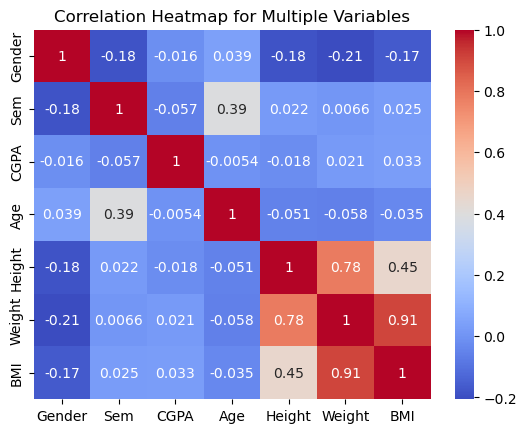

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = new_df.iloc[:, 3:10].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap for Multiple Variables")
plt.show()

In [36]:
X = new_df.iloc[:, 3:-1]
y = new_df.iloc[:, -1]

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
X_train.values

array([[  0.  ,   3.  ,  10.  , ..., 160.  ,  65.  ,  25.39],
       [  0.  ,   5.  ,   8.  , ..., 184.  ,  97.  ,  28.65],
       [  0.  ,   5.  ,   6.  , ..., 168.  ,  72.  ,  25.51],
       ...,
       [  1.  ,   7.  ,   6.  , ..., 175.  ,  80.  ,  26.12],
       [  0.  ,   5.  ,   9.  , ..., 172.  ,  67.  ,  22.65],
       [  0.  ,   3.  ,   9.  , ..., 184.  ,  89.  ,  26.29]])

In [38]:
def euclidean_distance(X_train, X_test):
    dist = np.zeros((len(X_test), len(X_train)))
    for i in range(len(X_test)):
        for j in range(len(X_train)):
            dist[i,j] = np.sqrt(np.sum((X_test[i] - X_train[j])**2))
    return dist
class KNN:
    def __init__(self, k = 5):
        self.k = k
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
        
    def predict(self, X_test):
        self.distances = euclidean_distance(self.X_train, X_test)
        pred = []
        for dist in self.distances:
            k_nearest_indices = np.argsort(dist)[:self.k]
            k_nearest_labels = self.y_train[k_nearest_indices]
            pred.append(np.unique(k_nearest_labels)[np.argmax(np.unique(k_nearest_labels, return_counts=True)[1])])
        return np.array(pred)

In [39]:
knn = KNN(6)
knn.fit(X_train.values, y_train.values)

In [40]:
y_pred = knn.predict(X_test.values)

In [41]:
def accuracy(y_pred,y_test):
    return np.sum(y_pred == y_test)/len(y_test)

print("Accuracy: ", accuracy(y_pred, y_test))
print("accuracy percentage: ", accuracy(y_pred, y_test)*100, "%")

Accuracy:  0.6938775510204082
accuracy percentage:  69.38775510204081 %


In [42]:
means = {}
stds = {}
for col in ['Gender', 'Sem', 'Age', 'CGPA', 'Height', 'Weight', 'BMI']:
    mean = X_train[col].mean()
    means[col] = mean
    std = X_train[col].std()
    stds[col] = std
    X_train[col] = (X_train[col] - mean) / std
    X_test[col] = (X_test[col] - mean) / std

In [43]:
knn = KNN(6)
knn.fit(X_train.values, y_train.values)

y_pred = knn.predict(X_test.values)

print("Accuracy: ", accuracy(y_pred, y_test))
print("accuracy percentage: ", accuracy(y_pred, y_test)*100, "%")

Accuracy:  0.7687074829931972
accuracy percentage:  76.87074829931973 %


In [44]:
def covariance(X):
    mean = np.mean(X,axis=0)
    X = X - mean
    return np.dot(X.T, X)/(X.shape[0]-1)

In [45]:
class PCA:
    def __init__(self, n_components):
        self.components = None
        self.n_components = n_components
        
    def fit(self, X):
        # covariance matrix
        cov = covariance(X)
        # eigenvalues and eigenvectors
        eigenvalues, eigenvectors = np.linalg.eig(cov)
        # sort eigenvalues and eigenvectors
        idx = eigenvalues.argsort()[::-1]
        eigenvalues = eigenvalues[idx]
        eigenvectors = eigenvectors[:, idx]
        # components
        self.components = eigenvectors[:, :self.n_components]
    
    def transform(self, X):
        return np.dot(X, self.components)

In [46]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components = 6)
# X_train = pca.fit_transform(X_train)
# X_test = pca.transform(X_test)
pca = PCA(6)
pca.fit(X_train)
X_train1 = pca.transform(X_train.values)
X_test1 = pca.transform(X_test.values)

In [47]:
knn = KNN(6)
knn.fit(X_train1, y_train.values)

y_pred = knn.predict(X_test1)

print("Accuracy: ", accuracy(y_pred, y_test))
print("accuracy percentage: ", accuracy(y_pred, y_test)*100, "%")

Accuracy:  0.7687074829931972
accuracy percentage:  76.87074829931973 %


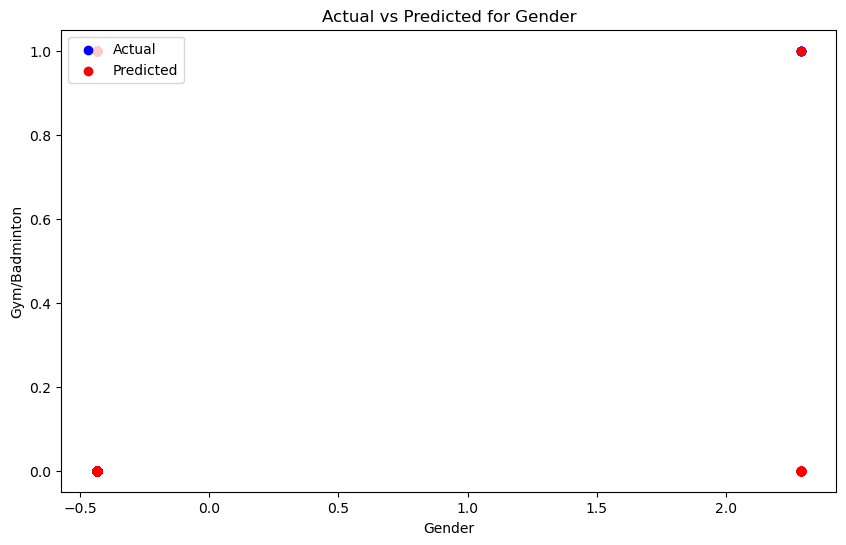

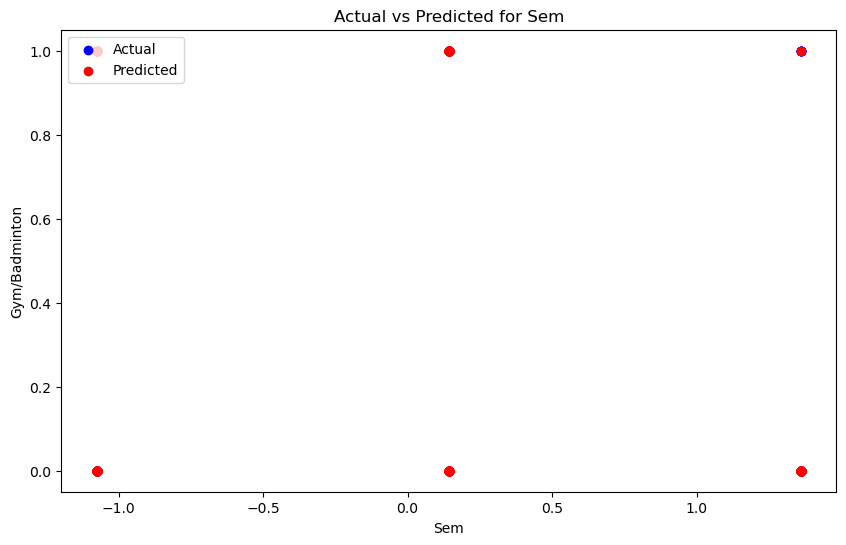

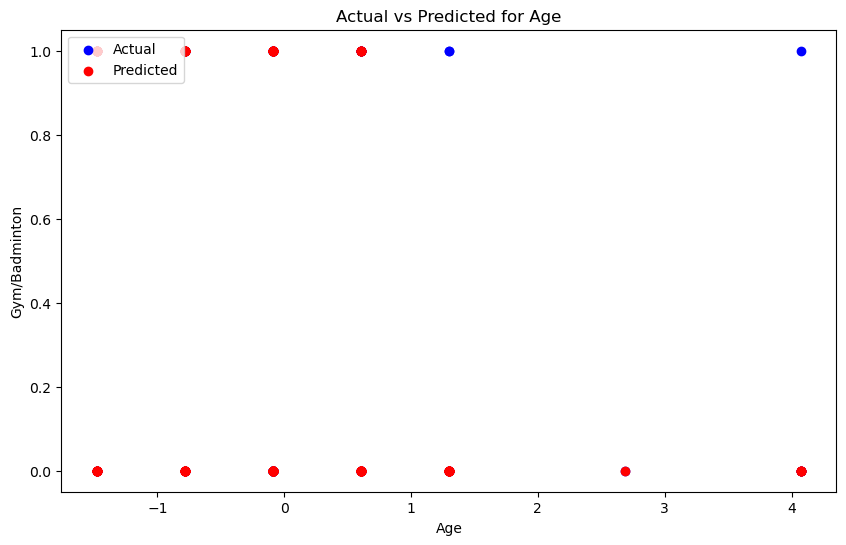

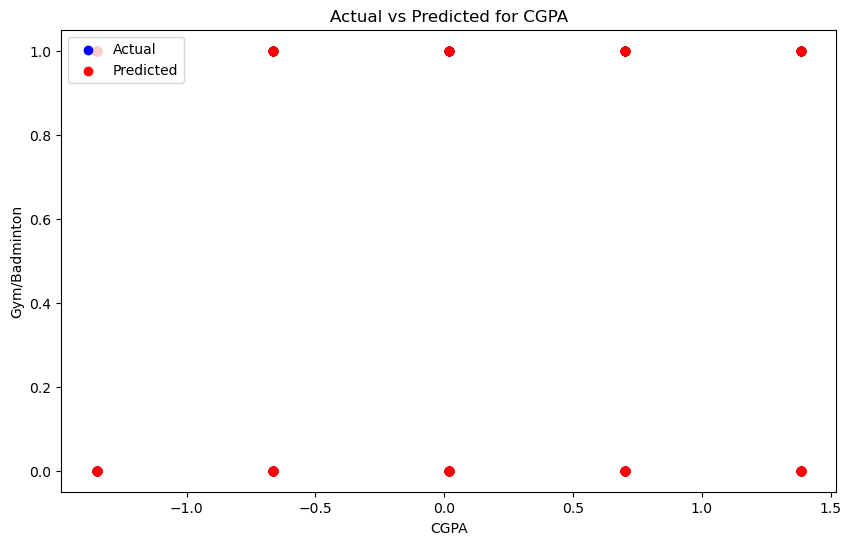

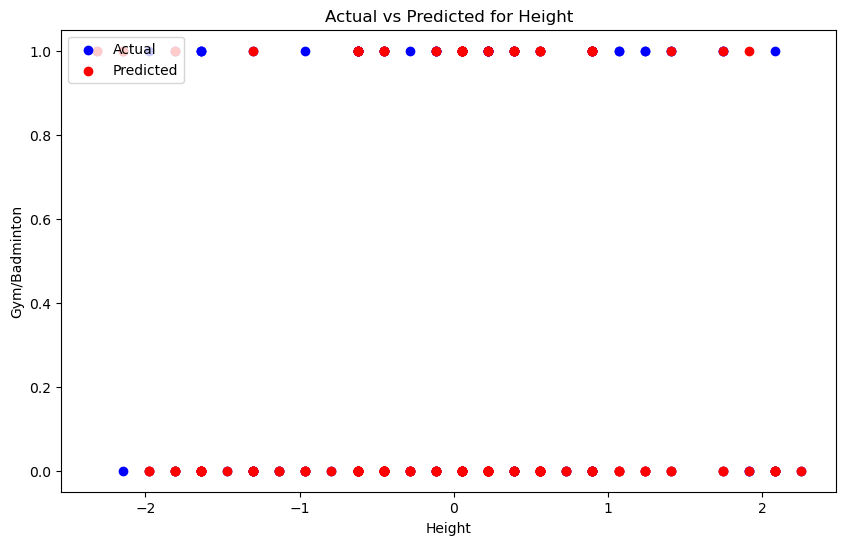

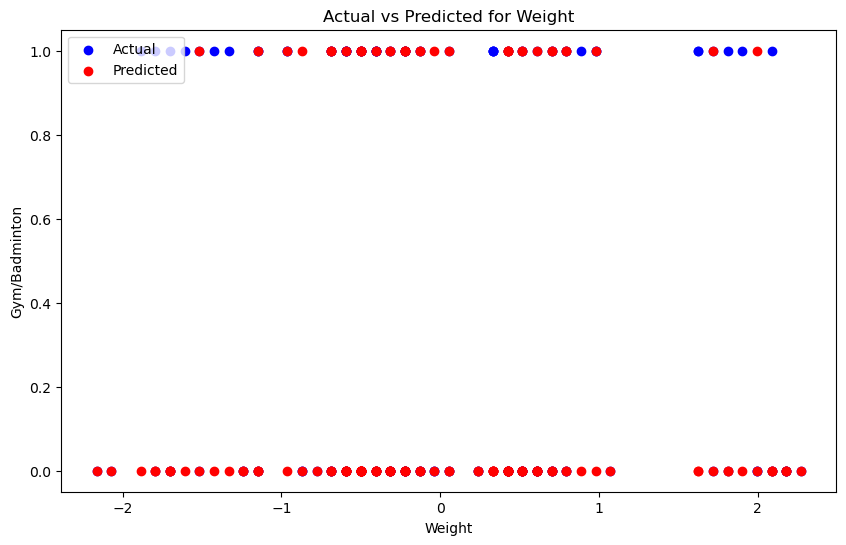

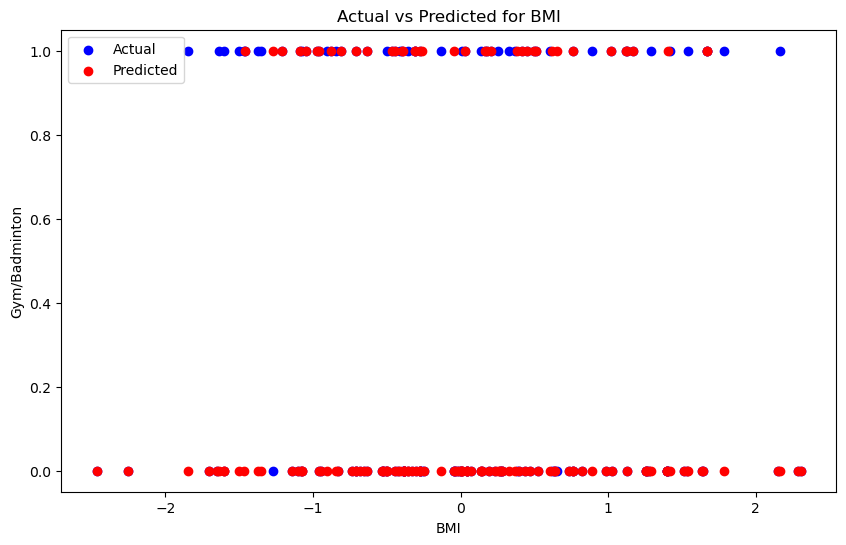

In [48]:
features = ['Gender', 'Sem', 'Age', 'CGPA', 'Height', 'Weight', 'BMI']

for feature in features:
    plt.figure(figsize=(10, 6))

    # Scatter plot for actual values
    plt.scatter(X_test[feature], y_test, color='blue', label='Actual')

    # Scatter plot for predicted values
    plt.scatter(X_test[feature], y_pred, color='red', label='Predicted')

    plt.title(f'Actual vs Predicted for {feature}')
    plt.xlabel(feature)
    plt.ylabel('Gym/Badminton')
    plt.legend(loc='upper left')
    plt.show()

/home/sujan/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/sujan/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/sujan/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/sujan/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/sujan/anaconda3/li

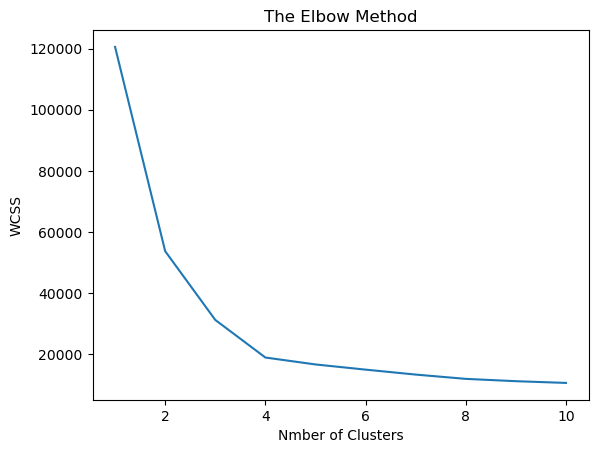

In [50]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init = 'k-means++', random_state=42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Nmber of Clusters')
plt.ylabel('WCSS')
plt.show()

In [52]:
kmeans = KMeans(n_clusters=2, init = 'k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)
print("Accuracy: ", accuracy(y_kmeans, y))
print("accuracy percentage: ", accuracy(y_kmeans, y)*100, "%")

Accuracy:  0.48435374149659866
accuracy percentage:  48.435374149659864 %


/home/sujan/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [49]:
#take input from user and predict
inputs = []
name = input("Enter your name: ")
roll = input("Enter your roll no: ")
degree = input("Enter your degree: ")
gender = input("Enter your gender: ")
if gender == "Male":
    inputs.append(0.0)
else:
    inputs.append(1.0)
sem = float(input("Enter your semester: "))
inputs.append(sem)
cgpa = float(input("Enter your cgpa: "))
if cgpa > 9.0:
    inputs.append(10.0)
elif cgpa > 8.0:
    inputs.append(9.0)
elif cgpa > 7.0:
    inputs.append(8.0)
elif cgpa > 6.0:
    inputs.append(7.0)
elif cgpa > 5.0:
    inputs.append(6.0)
else:
    inputs.append(5.0)
age = float(input("Enter your age: "))
inputs.append(age)
height = float(input("Enter your height(cm): "))
inputs.append(height)
weight = float(input("Enter your weight: "))
inputs.append(weight)
bmi = float(input("Enter your bmi: "))
inputs.append(bmi)

for i in range(len(inputs)):
    inputs[i] = (inputs[i] - means[features[i]]) / stds[features[i]]

inputs = np.array(inputs)

inputs = inputs.reshape(1, -1)

inputs = pca.transform(inputs)

y_pred = knn.predict(inputs)

print("Gym/Badminton: ", y_pred[0])



Gym/Badminton:  1.0
